In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [41]:
train_original=train.copy()
test_original=test.copy()

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [44]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


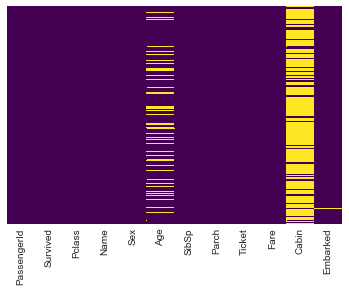

In [45]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

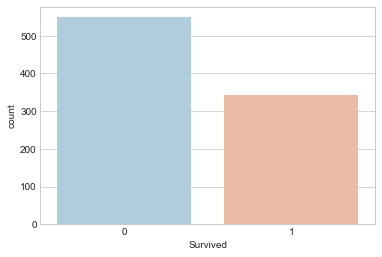

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

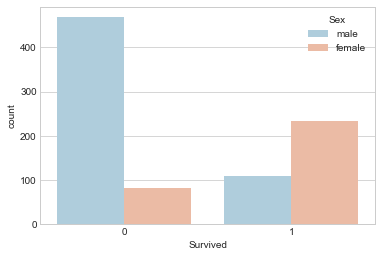

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

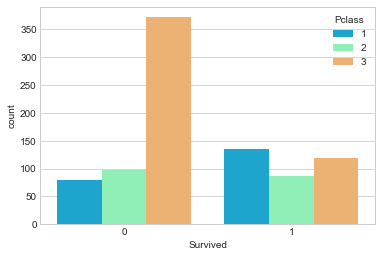

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

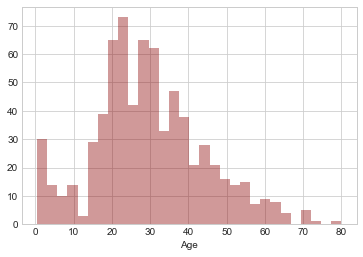

In [49]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

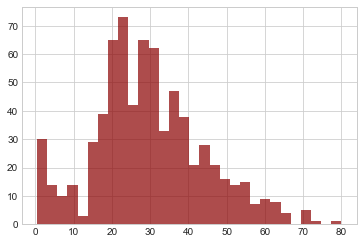

In [50]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

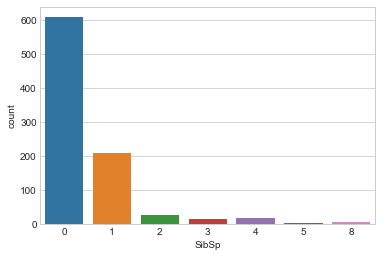

In [51]:
sns.countplot(x='SibSp',data=train)

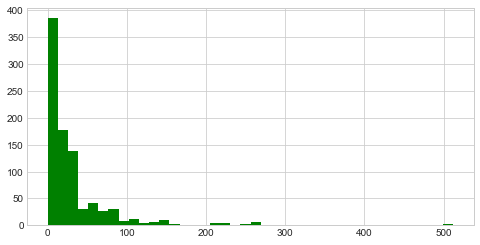

In [52]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [53]:
combi = train.append(test, ignore_index=True)
combi.shape

(1309, 12)

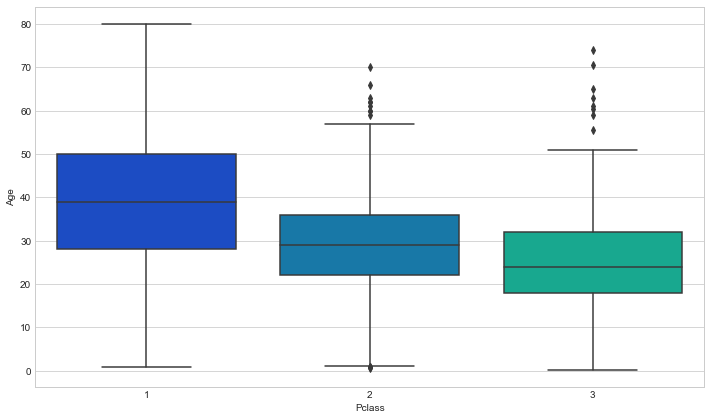

In [54]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=combi,palette='winter')

In [55]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 39

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [56]:
combi['Age'] = combi[['Age','Pclass']].apply(impute_age,axis=1)

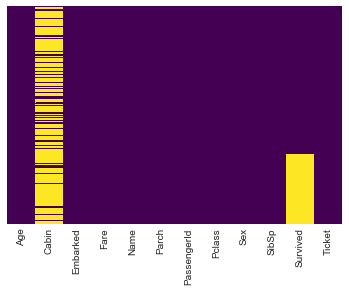

In [57]:
sns.heatmap(combi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
combi.drop('Cabin',axis=1,inplace=True)

In [59]:
combi.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [60]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1309 non-null float64
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [61]:
sex = pd.get_dummies(combi['Sex'],drop_first=True)
embark = pd.get_dummies(combi['Embarked'],drop_first=True)

In [62]:
combi.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [63]:
combi = pd.concat([combi,sex,embark],axis=1)

In [64]:
combi.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,male,Q,S
0,22.0,7.2500,0,1,3,1,0.0,1,0,1
1,38.0,71.2833,0,2,1,1,1.0,0,0,0
2,26.0,7.9250,0,3,3,0,1.0,0,0,1
3,35.0,53.1000,0,4,1,1,1.0,0,0,1
4,35.0,8.0500,0,5,3,0,0.0,1,0,1


In [65]:
train_new = combi.iloc[:891,:]
test_new = combi.iloc[891:,:]

In [77]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Age            891 non-null float64
Fare           891 non-null float64
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
SibSp          891 non-null int64
Survived       891 non-null float64
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(3), int64(4), uint8(3)
memory usage: 51.4 KB


In [79]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 10 columns):
Age            418 non-null float64
Fare           417 non-null float64
Parch          418 non-null int64
PassengerId    418 non-null int64
Pclass         418 non-null int64
SibSp          418 non-null int64
Survived       0 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(3), int64(4), uint8(3)
memory usage: 24.2 KB


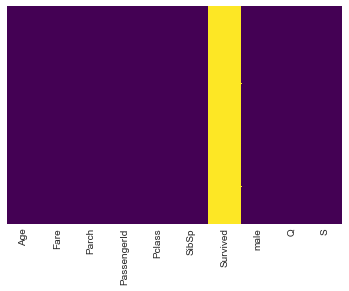

In [82]:
sns.heatmap(test_new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [66]:
from sklearn.model_selection import train_test_split

In [81]:
test_new['Fare'].fillna(test_new['Fare'].median(), inplace=True)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(train_new.drop('Survived',axis=1), 
                                                    train_new['Survived'], test_size=0.30, 
                                                    random_state=101)

In [68]:
from sklearn.linear_model import LogisticRegression

In [84]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
predictions = logmodel.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.77      0.88      0.82       154
        1.0       0.79      0.64      0.71       114

avg / total       0.78      0.78      0.77       268



In [87]:
test_pred = logmodel.predict(test_new.drop('Survived',axis=1))

In [89]:
test_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [90]:
submission=pd.read_csv('gender_submission.csv')

In [91]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [93]:
submission['PassengerId']=test_original['PassengerId']

In [94]:
submission['Survived']=test_pred

In [95]:
submission['Survived'].replace(0, 'N',inplace=True)
submission['Survived'].replace(1, 'Y',inplace=True)

In [96]:
pd.DataFrame(submission, columns=['PassengerId','Survived']).to_csv('titanicsurvival.csv',index=False)